# Задачи к Лекции 2

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

## Задачи

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn #классификаторы класические метооды мл
from matplotlib import pyplot as plt
import warnings
#warnings.filterwarnings('ignore')

df = pd.read_csv("mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


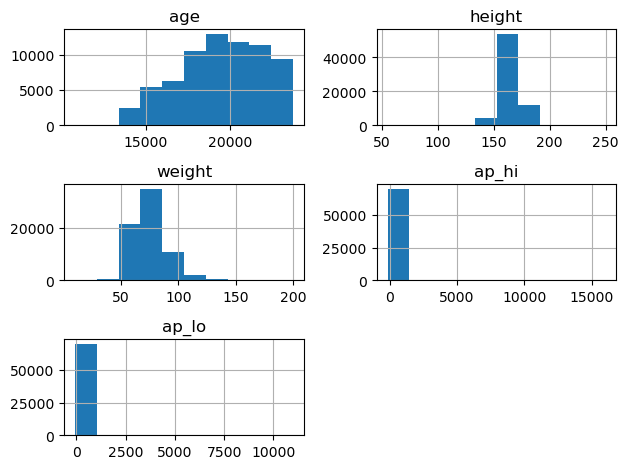

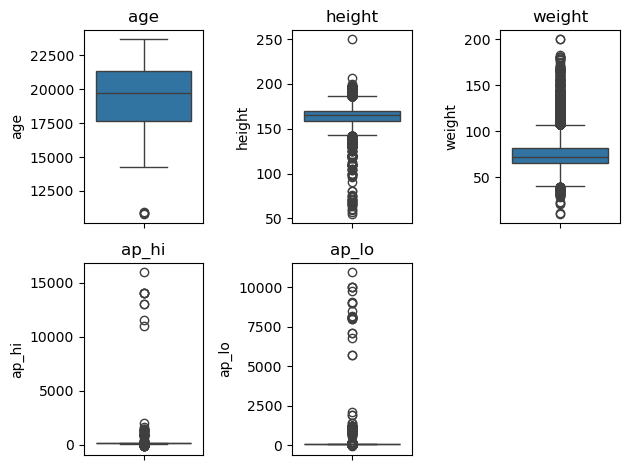

In [4]:
df[["age", "height", "weight", "ap_hi", "ap_lo"]].hist()
plt.tight_layout() #—ф-я библиотеки Matplotlib, которая автоматически настраивает параметры подграфиков, чтобы они точно вписывались в область рисунка
plt.show()

for i, col in enumerate(["age", "height", "weight", "ap_hi", "ap_lo"]):
    plt.subplot(231 + i) #выводит несколько графиков в 2 строки, 3 столбца, начиная с 1
    plt.title(col)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

# смотрим, что может повлиять на ошибочный результат
#везде кроме age есть выбросы

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

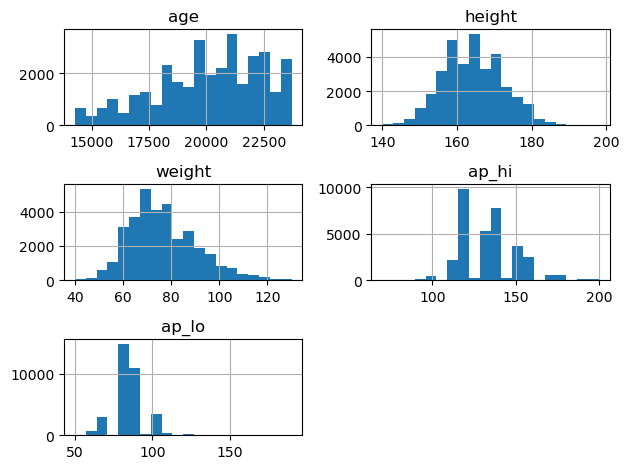

In [5]:
# уберем оутлаеры 
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200) & (df["ap_lo"] >= 50) & (df["ap_lo"] <= 200) & (df["height"] >= 140) & (df["height"] <= 200) & (df["weight"] >= 40) & (df["weight"] <= 130)]
data[data["cardio"] == 1][["age", "height", "weight", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()
plt.show()

In [6]:
#Матрица неточностей
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

точность =  0.7092699918042383


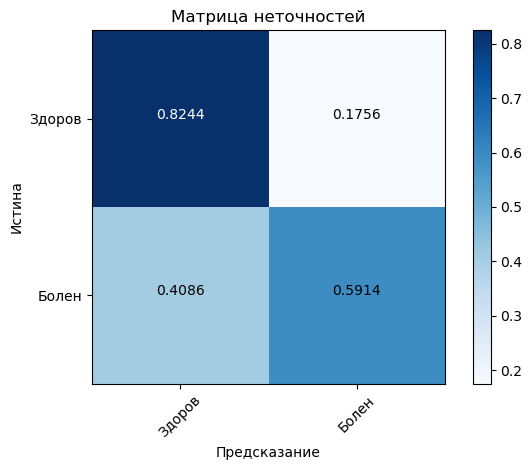

In [8]:
from sklearn.metrics import accuracy_score
train = data[["age", "height", "weight", "ap_hi", "ap_lo"]]
target = data["cardio"]

gnb = GaussianNB()
model = gnb.fit(train, target)
predict = model.predict(train)# Прогнозирование значений для тестовых данных
acc = accuracy_score(target, predict)
cnf = confusion_matrix(target, predict)

print("точность = ", acc)
plot_confusion_matrix(cnf, class_names, normalize = True)
plt.show()

**Комментарии:**  
вероятность назвать здорового человека здоровым больше, чем в лекции, 

вероятность ошибочно назвать больного здоровым больше, чем в лекции.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

точность =  0.5900070249385317


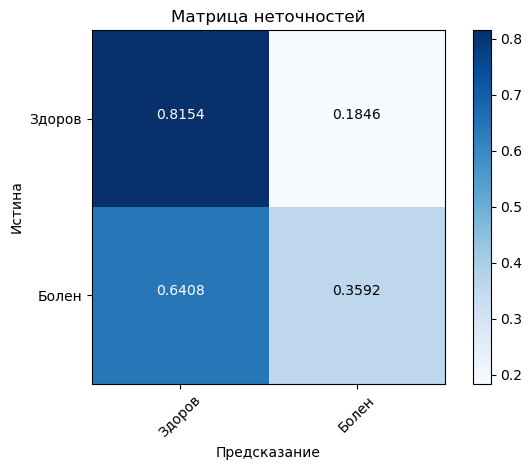

In [9]:
train = data[["cholesterol", "gluc"]]
target = data["cardio"]

gnb = GaussianNB()
model = gnb.fit(train, target)
predict = model.predict(train)# Прогнозирование значений для тестовых данных
acc = accuracy_score(target, predict)
cnf = confusion_matrix(target, predict)

print("точность = ", acc)
plot_confusion_matrix(cnf, class_names, normalize = True)
plt.show()

In [ ]:
"""
from collections import defaultdic

class CategorialNB:

    def _init_(self, weight = None):
    self.model_0 = []
    self.model_1 = []

    if weight is None:
        self.weight = [0.5, 0.5]
    else:
        w = weight[0] + weight[1]
        self.weight = [weight[0] / w, weight[1] / w]

    def fit(self, data, target):

    def predict_proba(self, data):

    def predict(self, data):
        proba = self.predict_proba(data)
        mask = proba
        return mask.astype("int")
        """

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

точность = 0.518089


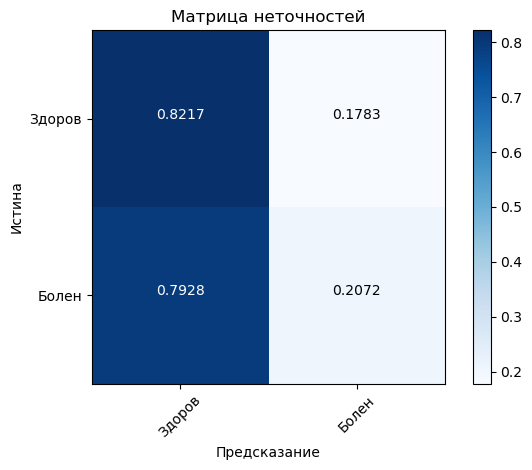

In [15]:
from sklearn.naive_bayes import GaussianNB

train = data[["gender", "smoke", "alco", "active"]]
target = data['cardio']

gnb = GaussianNB()

model = gnb.fit(train, target)
predict = model.predict(train)
cnf_matrix = confusion_matrix(target, predict)

print("точность = %f" % acc) 
plot_confusion_matrix(cnf, class_names, normalize = True)
plt.show()

**Комментарии:** вероятность определить больного человека правильно снизилась до 0,2 (было 0,6).

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

In [92]:
target = data['cardio']

prob = (gprob * cprob * bprob) / (gprob * cprob * bprob).sum(axis=1)[:,None]
predict = (prob[:,1] > prob[:,0].astype("int"))

acc = accuracy_score(target, predict)
cnf = confusion_matrix(target, predict)

print ("точность = %f" % acc) 
plot_confusion_matrix(cnf, class_names, normalize = True)

NameError: name 'cprob' is not defined

**Комментарии:** Ваши комментарии здесь.

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [3]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.